In [ ]:
import matplotlib.pyplot as plt, pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# **David Baldwine Osei**
# **001046496**
### Title: Predicting the probability of acceptance in Graduate School

#  **<center>Background</center>**

A project based on the admission of students into Graduate School that aims to use a students GRE Score, TOEFL Score, Rating of University applied to, Statement of Purpose, Letters of Recommendation, Cummulative Grade Point Average and Research Experience to predict if he/she would be admitted into his/her university of choice.
The data for this project can be found [here](https://www.kaggle.com/datasets/mohansacharya/graduate-admissions).

# **<center>Data Preprocessing</center>**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Science 1 Project/Admission_Predict_Ver1.1.csv")

In [ ]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


The goal of this project is to build a classification type of supervised learning.

As seen above, the DataFrame above cannot be used for this type of classification because the intended target variable is continuous.

To get the data in the form needed to build our preferred model, a new target column was created using the University Rating column and the continuous target column, Chance of Admit.

The coditions used in creating this column is shown below:


In [ ]:
df['Admitted'] = 0
df

for i in range(len(df)):
    if df['University Rating'].loc[i] >= 4 and df['Chance of Admit '].loc[i] >= 0.90:
        df['Admitted'].loc[i] = 1
    elif df['University Rating'].loc[i] < 4 and 0.65 <= df['Chance of Admit '].loc[i] <= 1:
        df['Admitted'].loc[i] = 1
    else:
        df['Admitted'].loc[i] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Now we save randomly make a selection of 100 samples as our holdout set.

In [ ]:
# df_holdout = df.sample(n = 100, random_state= 42)
# df_holdout

We now drop the Chance of Admit column since we would not need it for our model

In [ ]:
X = df.drop(df.columns[[0,-2,-1]], axis= 1)
y = df['Admitted']

# y_holdout = df_holdout['Admitted']
# X_holdout = df_holdout.drop(df.columns[[0,-2,-1]], axis= 1)


In [ ]:
X.isnull().any(), y.isnull().any()

(GRE Score            False
 TOEFL Score          False
 University Rating    False
 SOP                  False
 LOR                  False
 CGPA                 False
 Research             False
 dtype: bool, False)

It can be seen that there are no null value in the DataFrame. Hence there is no imputation needed in this project. We move on to perform some exploratory data analysis on our data



> # **Exploratory Data Analysis**






(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

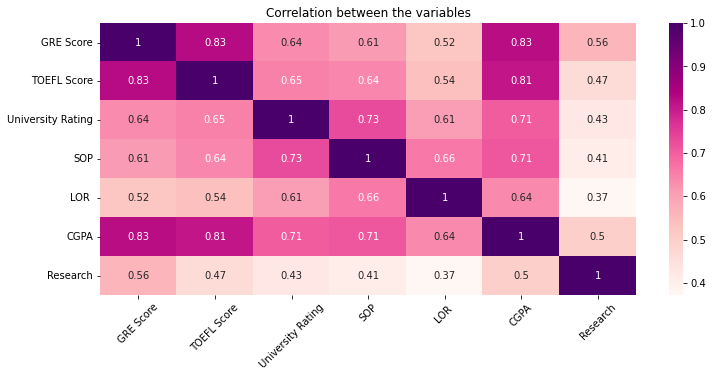

In [ ]:
plt.subplots(figsize=(12,5))
correlation_mat=X.corr()
sns.heatmap(correlation_mat,annot=True,cmap='RdPu')
plt.title('Correlation between the variables')
plt.xticks(rotation=45)

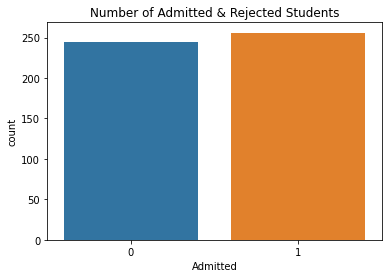

In [ ]:
fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x='Admitted', data=df)
plt.title("Number of Admitted & Rejected Students")
plt.show()

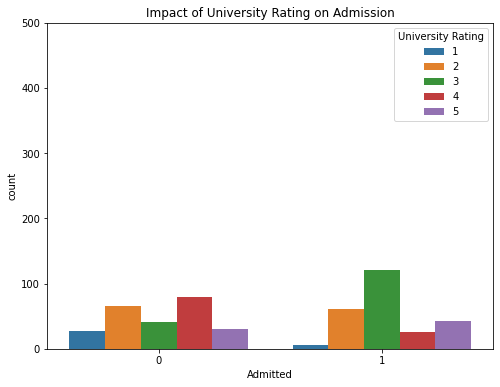

In [ ]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='Admitted', data=df, hue='University Rating')
ax.set_ylim(0,500)
plt.title("Impact of University Rating on Admission")
plt.show()

We can say that for high ranked universities it's relatively more difficult to get admitted

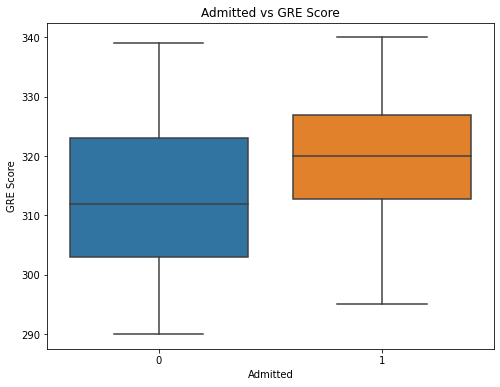

In [ ]:
fig, ax=plt.subplots(1,figsize=(8,6))
sns.boxplot(x='Admitted',y='GRE Score', data=df)
plt.title("Admitted vs GRE Score")
plt.show()

Average GRE Scores for admitted students are higher than those not admitted

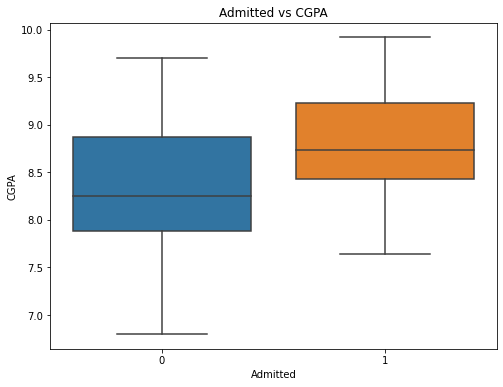

In [ ]:
fig, ax=plt.subplots(1,figsize=(8,6))
sns.boxplot(x='Admitted',y='CGPA', data=df)
plt.title("Admitted vs CGPA")
plt.show()

Average CGPA for admitted students are higher than those not admitted

 #  **Supervised Model Building and Selection**

> ## **K Nearest Neighbors(KNN)**  

KNeighborsClassifier(metric='euclidean', n_neighbors=12, weights='distance')
Our cross validation score for our modeling set with tuning is : 71.75%


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
380 fits failed out of a total of 760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
380 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 553, in _fit
    **self.effective_metric_params_,
  File "sklearn/neighbors/_binary_tree.pxi", line 966,

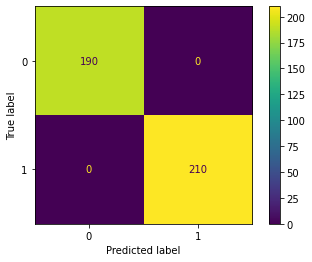

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.metrics import accuracy_score

k_range = range(1,20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


######################################

k_range = range(1,20)

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': range(1,20),
              'metric': ['seuclidean', 'euclidean'],
              'weights': ['uniform','distance']
}


grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

grid_search = grid.fit(X_train, y_train)

print(grid.best_estimator_)

accuracy = grid_search.best_score_ *100
print("Our cross validation score for our modeling set with tuning is : {:.2f}%".format(accuracy) )

plot_confusion_matrix(grid,X_train, y_train,values_format='d' )



#######################################

For our final model we can choose the following parameters: metric='euclidean', n_neighbors=12, weights='distance' and retrain the model with all the available data. And that will be our final model which is ready to make predictions.



Our generalization score with the holdout dataset is : 76.00%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


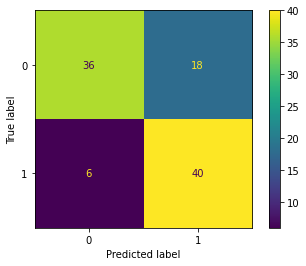

In [ ]:
#Testing Accuray of Model to holdout set

knn_model = KNeighborsClassifier(metric='euclidean', n_neighbors=12, weights='distance')
knn_model.fit(X_train, y_train)

y_test_hat=knn_model.predict(X_test)

test_accuracy=accuracy_score(y_test,y_test_hat)*100
print("Our generalization score with the holdout dataset is : {:.2f}%".format(test_accuracy) )

plot_confusion_matrix(grid,X_test, y_test,values_format='d')

# knn = KNeighborsClassifier(metric='euclidean', n_neighbors=12, weights='distance')
# knn.fit(X,y)

It can be seen that our final model has a generalization score of 76% and a cross validation score of 71.75%. Thus there's no over or underfitting in our model. The exact number of prediction made right and wrong by the model can be seen in the confusion matrix above.

> ## **Support Vector Machine(SVM)**

SVC(C=2, gamma='auto')
Our cross validation score for our modeling set with tuning is : 73.25%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


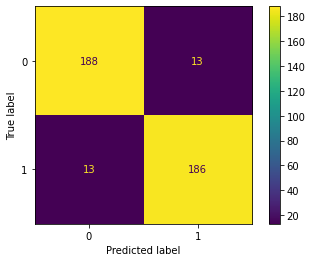

In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
###########################
k_range = range(1,20)

support_V = SVC()

param_grid = {'C': range(1,20),
            'kernel': ['linear', 'rbf'],#, 'rbf', 'sigmoid', 'precomputed'],
            #'degree': range(1,3),
            'gamma' : ['scale', 'auto']
}


grid = GridSearchCV(support_V, param_grid, cv = 5)# refit=True, verbose=3)

grid_search = grid.fit(X_train, y_train)

print(grid.best_estimator_)

accuracy = grid_search.best_score_ *100
print("Our cross validation score for our modeling set with tuning is : {:.2f}%".format(accuracy) )

plot_confusion_matrix(grid,X_train, y_train,values_format='d' )




Our generalization score with the holdout dataset is : 81.00%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


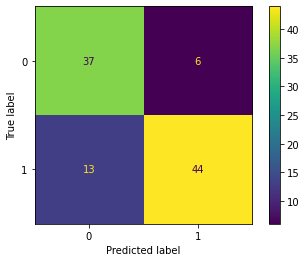

In [ ]:
#Testing Accuray of Model to holdout set

support_V_model = grid.best_estimator_

support_V_model.fit(X_train, y_train)

y_test_hat=support_V_model.predict(X_test)

test_accuracy=accuracy_score(y_test,y_test_hat)*100
print("Our generalization score with the holdout dataset is : {:.2f}%".format(test_accuracy) )

plot_confusion_matrix(grid,X_test, y_test,values_format='d' )


It can be seen that our final model has a generalization score of 81% and a cross validation score of 73.25%. Thus there's no over or underfitting in our model. The exact number of prediction made right and wrong by the model can be seen in the confusion matrix above.

> ## **Naive Bayes**

GaussianNB()
Our cross validation score for our modeling set with tuning is : 60.50%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


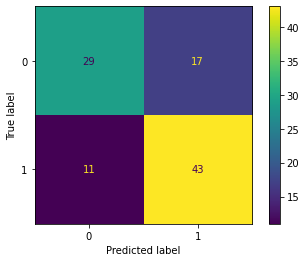

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

# for i in range(1,20):

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)
###########################
#k_range = range(1,20)

skf = StratifiedKFold(n_splits=5)
gnb = GaussianNB()

param_grid = { }


grid = GridSearchCV(gnb, param_grid=param_grid, cv = skf, return_train_score=True)# refit=True, verbose=3)

grid_search = grid.fit(X_train, y_train)

print(grid.best_estimator_)

accuracy = grid_search.best_score_ *100
print("Our cross validation score for our modeling set with tuning is : {:.2f}%".format(accuracy) )

plot_confusion_matrix(grid,X_test, y_test,values_format='d' )



Our generalization score with the holdout dataset is : 72.00%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


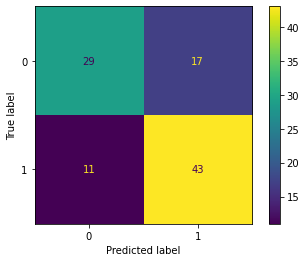

In [ ]:
#Testing Accuray of Model to test set

gnb_model = grid.best_estimator_

gnb_model.fit(X_train, y_train)

y_test_hat=gnb_model.predict(X_test)

test_accuracy=accuracy_score(y_test,y_test_hat)*100
print("Our generalization score with the holdout dataset is : {:.2f}%".format(test_accuracy) )

plot_confusion_matrix(grid,X_test, y_test,values_format='d' )


It can be seen that our final model has a generalization score of 72% and a cross validation score of 60.50%. Thus there's no over or underfitting in our model. The exact number of prediction made right and wrong by the model can be seen in the confusion matrix above.

> ## **Random Forest**

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=200,
                       random_state=42)
Our cross validation score for our modeling set with tuning is : 83.25%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


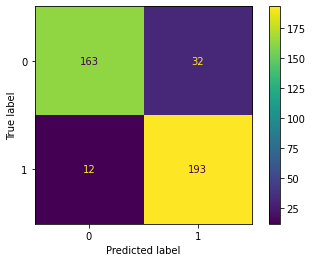

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

# for i in range(1,20):

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
###########################
#k_range = range(1,20)

rfc=RandomForestClassifier(random_state=42)

param_grid = {
            # 'random_state': [30,42],
            'n_estimators': [200, 500],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth' : [4,5,6,7,8],
            'criterion' :['gini', 'entropy']
}


grid = GridSearchCV(rfc, param_grid=param_grid, cv = 5, return_train_score=True)

grid_search = grid.fit(X_train, y_train)

print(grid.best_estimator_)

accuracy = grid_search.best_score_ *100
print("Our cross validation score for our modeling set with tuning is : {:.2f}%".format(accuracy) )

plot_confusion_matrix(grid,X_train, y_train,values_format='d' )








Our generalization score with the holdout dataset is : 91.00%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


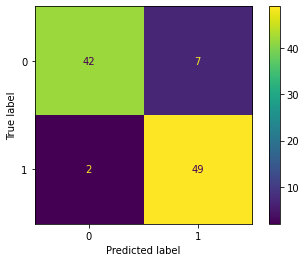

In [ ]:
rfc_model=grid.best_estimator_

rfc_model.fit(X_train, y_train)

y_test_hat=rfc_model.predict(X_test)

test_accuracy=accuracy_score(y_test, y_test_hat)*100
print("Our generalization score with the holdout dataset is : {:.2f}%".format(test_accuracy) )

plot_confusion_matrix(grid,X_test, y_test,values_format='d' )



It can be seen that our final model has a generalization score of 91% and a cross validation score of 83.25%. Thus there's no over or underfitting in our model. The exact number of prediction made right and wrong by the model can be seen in the confusion matrix above.

# Stacking

Stacking or Stacked Generalization is an ensemble machine learning algorithm.

It uses a meta-learning algorithm to learn how to best combine the predictions from two or more base machine learning algorithms.

The benefit of stacking is that it can harness the capabilities of a range of well-performing models on a classification or regression task and make predictions that have better performance than any single model in the ensemble.

In [ ]:
from sklearn.ensemble import StackingClassifier

Stack_model  = StackingClassifier([('KNN', knn_model),('SVM', support_V_model), ('NB',gnb_model) ,('RFC', rfc_model)],
                                  final_estimator=RandomForestClassifier())

Stack_model.fit(X_train, y_train)
Stack_model.score(X_train, y_train)

print(Stack_model.fit(X_train, y_train))
print(Stack_model.score(X_test, y_test))

StackingClassifier(estimators=[('KNN',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=12,
                                                     weights='distance')),
                               ('SVM', SVC(C=2, gamma='auto')),
                               ('NB', GaussianNB()),
                               ('RFC',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=5,
                                                       n_estimators=200,
                                                       random_state=42))],
                   final_estimator=RandomForestClassifier())
0.84


# Conclusion

We can therefore conclude that amongst all the models developed, the model developed by the Random Forest algorithm seems to be the most efficient since it has the largest genearalization score of **91%**.

# References



*   [Data Source](https://www.kaggle.com/datasets/mohansacharya/graduate-admissions)
*   [K Nearest Neighbors](https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75)
*  [Support Vector Machine](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
* [Random Forest](https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv/notebook)





